# Aggression & Misogyny Detection Using BERT

## Description

## Group Members

| <img src="https://avatars.githubusercontent.com/u/20398468?v=4" width="100" height="100" /> | <img src="https://avatars.githubusercontent.com/u/63922043?v=4" width="100" height="100" />
  :---: | :---:
| [shaheer-2000 (19K-0233)](https://github.com/shaheer-2000) | [Noman Vadsariya (19K-1432)](https://github.com/Noman-Vadsariya)

# Initialization

## Cloning Resources

In [91]:
!git clone https://github.com/Noman-Vadsariya/Classification_Project.git

fatal: destination path 'Classification_Project' already exists and is not an empty directory.


## Mounting Google Drive

In [92]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Installing Dependencies

In [93]:
!pip install keras-tuner emoji==1.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Packages

### General Model Use-Case Packages

In [94]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras_tuner as kt
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import seaborn as sns

# from datetime import datetime
# from wordcloud import WordCloud
# from tqdm.notebook import tqdm

In [176]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [177]:
from sklearn.metrics import classification_report, f1_score

### Textual Processing Packages

In [95]:
import nltk

nltk.download('stopwords')
# nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
import emoji

In [97]:
import re
import string

In [98]:
from Classification_Project import tokenization

## Documenting TF + TF-Hub versions

In [99]:
print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)

tensorflow version :  2.8.2
tensorflow_hub version :  0.12.0


## Setting Up Data Directories

In [100]:
DATA_DIR = {
    "TRAIN": "/content/Classification_Project/Classification_Project/train/trac2_eng_train.csv",
    "VAL": "/content/Classification_Project/Classification_Project/validation/trac2_eng_dev.csv",
    "TEST": "/content/Classification_Project/Classification_Project/test/trac2_eng_test.csv",
}

OUT_DIR = {
    "MODEL_A": "/content/gdrive/MyDrive/Classification_Project/models/model_a.h5",
    "MODEL_B": "/content/gdrive/MyDrive/Classification_Project/models/model_b.h5"
}

In [101]:
# train_dir = "/content/Classification_Project/Classification_Project/train/"
# val_dir = "/content/Classification_Project/Classification_Project/validation/"
# test_dir = "/content/Classification_Project/Classification_Project/test/"

# OUTPUT_DIR = "/content/gdrive/MyDrive/Classification_Project/model.h5"


## Importing To DataFrames

In [102]:
training_data = pd.read_csv(DATA_DIR["TRAIN"])
validation_data = pd.read_csv(DATA_DIR["VAL"])
testing_data = pd.read_csv(DATA_DIR["TEST"])

## Documenting Initial Datasets

In [103]:
print("Training Set Shape :", training_data.shape)
print("Validation Set Shape :", validation_data.shape)
print("Test Set Shape :", testing_data.shape)

Training Set Shape : (4263, 4)
Validation Set Shape : (1066, 4)
Test Set Shape : (1200, 2)


### Training Dataset

In [104]:
training_data.head()

,ID,Text,Sub-task A,Sub-task B
0,C45.451,Next part,NAG,NGEN
1,C47.11,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG,NGEN
2,C33.79,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG,NGEN
3,C4.1961,What the fuck was this? I respect shwetabh and...,NAG,NGEN
4,C10.153,Concerned authorities should bring arundathi R...,NAG,NGEN


### Validation Dataset

In [105]:
validation_data.head()

,ID,Text,Sub-task A,Sub-task B
0,C7.2589,U deserve more subscribers. U really great.,NAG,NGEN
1,C68.872,Nice video....,NAG,NGEN
2,C36.762,sorry if i bother somebody.. iam a defence asp...,NAG,GEN
3,C4.1540.1,Joker was amazing....it was not glamorised !.....,NAG,NGEN
4,C59.68,Nice baro,NAG,NGEN


### Testing Dataset

In [106]:
testing_data.head()

,ID,Text
0,YoutubeCorpus37,https://www.youtube.com/watch?v=4iejjszkflo
1,C37.1,shame on society & culture trying to justify t...
2,C37.2,"just wanna say, there is no gay gene. you can ..."
3,C37.3,"well, if a one twin struggles with self confid..."
4,C37.4,i am an identical twin and we are both homosex...


# DataFrame PreProcessing

## Training DataFrame PreProcessing

In [107]:
training_data.head()

,ID,Text,Sub-task A,Sub-task B
0,C45.451,Next part,NAG,NGEN
1,C47.11,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG,NGEN
2,C33.79,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG,NGEN
3,C4.1961,What the fuck was this? I respect shwetabh and...,NAG,NGEN
4,C10.153,Concerned authorities should bring arundathi R...,NAG,NGEN


In [108]:
training_data = training_data.rename(columns={ "Text": "text", "Sub-task A": "labels_A", "Sub-task B": "labels_B" })
training_data = training_data.drop("ID", axis=1)

In [109]:
training_data.head()

,text,labels_A,labels_B
0,Next part,NAG,NGEN
1,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG,NGEN
2,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG,NGEN
3,What the fuck was this? I respect shwetabh and...,NAG,NGEN
4,Concerned authorities should bring arundathi R...,NAG,NGEN


## Validation DataFrame PreProcessing

In [110]:
validation_data.head()

,ID,Text,Sub-task A,Sub-task B
0,C7.2589,U deserve more subscribers. U really great.,NAG,NGEN
1,C68.872,Nice video....,NAG,NGEN
2,C36.762,sorry if i bother somebody.. iam a defence asp...,NAG,GEN
3,C4.1540.1,Joker was amazing....it was not glamorised !.....,NAG,NGEN
4,C59.68,Nice baro,NAG,NGEN


In [111]:
validation_data = validation_data.rename(columns={ "Text": "text", "Sub-task A": "labels_A", "Sub-task B": "labels_B" })
validation_data = validation_data.drop("ID", axis=1)

In [112]:
validation_data.head()

,text,labels_A,labels_B
0,U deserve more subscribers. U really great.,NAG,NGEN
1,Nice video....,NAG,NGEN
2,sorry if i bother somebody.. iam a defence asp...,NAG,GEN
3,Joker was amazing....it was not glamorised !.....,NAG,NGEN
4,Nice baro,NAG,NGEN


## Testing DataFrame PreProcessing

In [113]:
testing_data.head()

,ID,Text
0,YoutubeCorpus37,https://www.youtube.com/watch?v=4iejjszkflo
1,C37.1,shame on society & culture trying to justify t...
2,C37.2,"just wanna say, there is no gay gene. you can ..."
3,C37.3,"well, if a one twin struggles with self confid..."
4,C37.4,i am an identical twin and we are both homosex...


In [114]:
testing_data = testing_data.rename(columns={ "Text": "text" })
testing_data = testing_data.drop("ID", axis=1)

In [115]:
testing_data.head()

,text
0,https://www.youtube.com/watch?v=4iejjszkflo
1,shame on society & culture trying to justify t...
2,"just wanna say, there is no gay gene. you can ..."
3,"well, if a one twin struggles with self confid..."
4,i am an identical twin and we are both homosex...


### Converting Labels To Numeric Equivalents

In [116]:
enum_labels_A_arr = training_data['labels_A'].unique()
enum_labels_A = { enum_labels_A_arr[x]: x for x in range(len(enum_labels_A_arr)) }
enum_labels_A

{'CAG': 1, 'NAG': 0, 'OAG': 2}

In [117]:
enum_labels_B_arr = training_data['labels_B'].unique()
enum_labels_B = { enum_labels_B_arr[x]: x for x in range(len(enum_labels_B_arr)) }
enum_labels_B

{'GEN': 1, 'NGEN': 0}

In [118]:
training_data["labels_A"] = training_data["labels_A"].map(lambda x: enum_labels_A[x])
training_data["labels_B"] = training_data["labels_B"].map(lambda x: enum_labels_B[x])

In [119]:
training_data.head()

,text,labels_A,labels_B
0,Next part,0,0
1,Iii8mllllllm\nMdxfvb8o90lplppi0005,0,0
2,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,0,0
3,What the fuck was this? I respect shwetabh and...,0,0
4,Concerned authorities should bring arundathi R...,0,0


In [120]:
validation_data["labels_A"] = validation_data["labels_A"].map(lambda x: enum_labels_A[x])
validation_data["labels_B"] = validation_data["labels_B"].map(lambda x: enum_labels_B[x])

In [121]:
validation_data.head()

,text,labels_A,labels_B
0,U deserve more subscribers. U really great.,0,0
1,Nice video....,0,0
2,sorry if i bother somebody.. iam a defence asp...,0,1
3,Joker was amazing....it was not glamorised !.....,0,0
4,Nice baro,0,0


# Data Cleaning & PreProcessing
Removing stopwords, emojis, HTML, @mentions, punctuations, URLs, numerical characters and all other kind of possible noise

In [122]:
class TextProcessor:
  def __init__(self):
    self.stopwords = nltk.corpus.stopwords.words('english')
    self.punct_table = str.maketrans('', '', string.punctuation)
    # self.emoji_patt = re.compile(
    #       '['
    #       u'\U0001F600-\U0001F64F'  # emoticons
    #       u'\U0001F300-\U0001F5FF'  # symbols & pictographs
    #       u'\U0001F680-\U0001F6FF'  # transport & map symbols
    #       u'\U0001F1E0-\U0001F1FF'  # flags
    #       u'\U00002702-\U000027B0'
    #       u'\U000024C2-\U0001F251'
    #       ']+',
    #       flags=re.UNICODE
    #       )
    self.url_patt = re.compile(r'https?://\S+|www\.\S+')
    self.mentions_patt = re.compile(r"(@[A-Za-z0-9]+)")
    self.html_patt = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    self.stopwords_patt = re.compile(r'\b(' + r'|'.join(self.stopwords) + r')\b\s*')

  def remove_URL(self, text):
      text = str(text)
      return self.url_patt.sub(r'', text)

  def remove_emoji(self, text):
      return emoji.get_emoji_regexp().sub(u'', text)

  def remove_mentions(self, text):
      return self.mentions_patt.sub(r'', text)

  def remove_html(self, text):
      return self.html_patt.sub(r'', text)

  def remove_punct(self, text):
      return text.translate(self.punct_table)

  def remove_stopwords(self, text):
    return self.stopwords_patt.sub('', text)

  def clean_text(self, text):
    text = self.remove_URL(text)
    text =  self.remove_emoji(text)
    text =  self.remove_mentions(text)
    text =  self.remove_punct(text)
    text = self.remove_stopwords(text)
    text = text.replace("\n", " ")
    text = re.sub(r"[0-9]", "", text)
    text =  text.lower()

    return text

  def process(self, text):
    return self.clean_text(text)

In [123]:
txtprocssr = TextProcessor()

## Cleaning Training Data

In [124]:
training_data["text"] = training_data["text"].apply(txtprocssr.process)

In [125]:
training_data.replace("", np.nan, inplace=True)
training_data.dropna(subset=["text"], inplace=True)

In [126]:
training_data.head()

,text,labels_A,labels_B
0,next part,0,0
1,iiimllllllm mdxfvbolplppi,0,0
2,osm vedio keep upmake vedios like,0,0
3,what fuck i respect shwetabh watching videos q...,0,0
4,concerned authorities bring arundathi roy type...,0,0


## Cleaning Validation Data

In [127]:
validation_data["text"] = validation_data["text"].apply(txtprocssr.process)

In [128]:
validation_data.replace("", np.nan, inplace=True)
validation_data.dropna(subset=["text"], inplace=True)

In [129]:
validation_data.head()

,text,labels_A,labels_B
0,u deserve subscribers u really great,0,0
1,nice video,0,0
2,sorry bother somebody iam defence aspirant t...,0,1
3,joker amazingit glamorised kabir singh tatti x,0,0
4,nice baro,0,0


## Cleaning Testing Data

In [130]:
testing_data["text"] = testing_data["text"].apply(txtprocssr.process)

In [131]:
testing_data.replace("", np.nan, inplace=True)
testing_data.dropna(subset=["text"], inplace=True)

In [132]:
testing_data.head()

,text
1,shame society culture trying justify desire l...
2,wanna say gay gene truly seriously cured accep...
3,well one twin struggles self confidence world ...
4,identical twin homosexual knew since like th...
5,god wouldnt said homosexuality abomination peo...


## Segregating Task-A (Aggression Detection) & Task-B (Misogyny Detection) DataFrames

### Training Data Segregation

#### Aggression Detection Labelled Data

In [133]:
train_A = training_data[["text", "labels_A"]].copy()

In [134]:
train_A.head()

,text,labels_A
0,next part,0
1,iiimllllllm mdxfvbolplppi,0
2,osm vedio keep upmake vedios like,0
3,what fuck i respect shwetabh watching videos q...,0
4,concerned authorities bring arundathi roy type...,0


#### Misogyny Detection Labelled Data

In [135]:
train_B = training_data[["text", "labels_B"]].copy()

In [136]:
train_B.head()

,text,labels_B
0,next part,0
1,iiimllllllm mdxfvbolplppi,0
2,osm vedio keep upmake vedios like,0
3,what fuck i respect shwetabh watching videos q...,0
4,concerned authorities bring arundathi roy type...,0


### Validation Data Segregation

#### Aggression Detection Labelled Data

In [137]:
val_A = validation_data[["text", "labels_A"]].copy()

In [138]:
val_A.head()

,text,labels_A
0,u deserve subscribers u really great,0
1,nice video,0
2,sorry bother somebody iam defence aspirant t...,0
3,joker amazingit glamorised kabir singh tatti x,0
4,nice baro,0


#### Misogyny Detection Labelled Data

In [139]:
val_B = validation_data[["text", "labels_B"]].copy()

In [140]:
val_B.head()

,text,labels_B
0,u deserve subscribers u really great,0
1,nice video,0
2,sorry bother somebody iam defence aspirant t...,1
3,joker amazingit glamorised kabir singh tatti x,0
4,nice baro,0


# TODO!!!

- Pickle and save preprocessed data
- Pickle and save segregated data

# Exploratory Data Analysis

## Exploring Aggression Detection (Task-A) Dataset

### Class Distribution

In [141]:
NAG_count = train_A[train_A["labels_A"] == 0].count()[0]
CAG_count = train_A[train_A["labels_A"] == 1].count()[0]
OAG_count = train_A[train_A["labels_A"] == 2].count()[0]

print("NAG\t{}\nCAG\t{}\nOAG\t{}".format(NAG_count, CAG_count, OAG_count))

NAG	3342
CAG	453
OAG	435


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Aggression Levels'),
 Text(0.5, 1.0, 'Distribution Of Aggression Levels')]

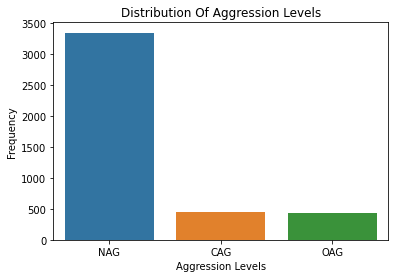

In [142]:
ax = sns.barplot(x=["NAG", "CAG", "OAG"], y=[NAG_count, CAG_count, OAG_count])
ax.set(xlabel="Aggression Levels", ylabel="Frequency", title="Distribution Of Aggression Levels")

#### Conclusion
Not Aggressive (NAG) samples heavily overwhelm Covertly Aggressive (CAG) and Overtly Aggressive (OAG) samples in our dataset. We need to balance our dataset to avoid overfitting.

## Exploring Misogyny Detection (Task-B) Dataset)

### Class Distribution

In [143]:
NGEN_count = train_B[train_B["labels_B"] == 0].count()[0]
GEN_count = train_B[train_B["labels_B"] == 1].count()[0]

print("NGEN\t{}\nGEN\t{}\n".format(NGEN_count, GEN_count))

NGEN	3921
GEN	309



[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Misogyny Labels'),
 Text(0.5, 1.0, 'Distribution Of Gendered (GEN) & Non-Gendered (NGEN) Documents')]

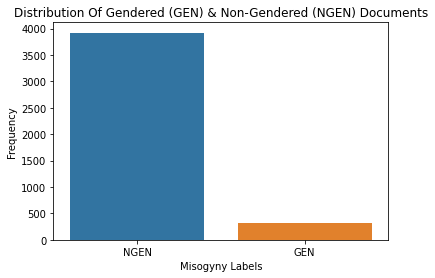

In [144]:
ax = sns.barplot(x=["NGEN", "GEN"], y=[NGEN_count, GEN_count])
ax.set(xlabel="Misogyny Labels", ylabel="Frequency", title="Distribution Of Gendered (GEN) & Non-Gendered (NGEN) Documents")

#### Conclusion
Not-Gendered (NGEN) samples heavily overwhelm Gendered (GEN) samples in our dataset. We need to balance our dataset to avoid overfitting.

# Handling Imbalanced Data

## Handling Task-A's Data Imbalance

### OverSampling & UnderSampling

In [145]:
sample_counts_A = train_A["labels_A"].value_counts()

In [146]:
max_samples_A = sample_counts_A.max()

In [147]:
sample_counts_A

0    3342
1     453
2     435
Name: labels_A, dtype: int64

In [149]:
train_A_NAG = train_A[train_A["labels_A"] == 0]
train_A_CAG = train_A[train_A["labels_A"] == 1]
train_A_OAG = train_A[train_A["labels_A"] == 2]

In [150]:
train_AA = train_A.copy()

In [151]:
train_A_NAG = train_A_NAG.sample(3500, replace=True) # sample_counts_A[0]
train_A_CAG = train_A_CAG.sample(4000, replace=True) # max_samples_A - sample_counts_A[1]
train_A_OAG = train_A_OAG.sample(4000, replace=True) # max_samples_A - sample_counts_A[2]

In [152]:
train_A = pd.concat([train_A_NAG, train_A_CAG, train_A_OAG], axis=0)

In [153]:
train_A["labels_A"].value_counts()

1    4000
2    4000
0    3500
Name: labels_A, dtype: int64

### Class Distribution

In [64]:
NAG_count = train_A[train_A["labels_A"] == 0].count()[0]
CAG_count = train_A[train_A["labels_A"] == 1].count()[0]
OAG_count = train_A[train_A["labels_A"] == 2].count()[0]

print("NAG\t{}\nCAG\t{}\nOAG\t{}".format(NAG_count, CAG_count, OAG_count))

NAG	3342
CAG	2889
OAG	2907


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Aggression Levels'),
 Text(0.5, 1.0, 'Distribution Of Aggression Levels')]

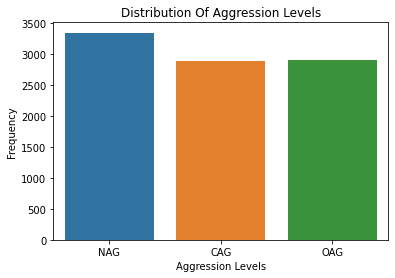

In [65]:
ax = sns.barplot(x=["NAG", "CAG", "OAG"], y=[NAG_count, CAG_count, OAG_count])
ax.set(xlabel="Aggression Levels", ylabel="Frequency", title="Distribution Of Aggression Levels")

#### Conclusion
CAG and OAG have been OverSampled, but _noise_ has been maintained so proportions between CAG and OAG remain the same, but the impact of NAG is reduced.

## Handling Task-B's Data Imbalance

### OverSampling & UnderSampling

In [154]:
sample_counts_B = train_B["labels_B"].value_counts()

In [155]:
max_samples_B = sample_counts_B.max()

In [156]:
sample_counts_B

0    3921
1     309
Name: labels_B, dtype: int64

In [157]:
train_B_NGEN = train_B[train_B["labels_B"] == 0]
train_B_GEN = train_B[train_B["labels_B"] == 1]

In [158]:
train_BB = train_B.copy()

In [159]:
train_B_NGEN = train_B_NGEN.sample(3500, replace=True) # sample_counts_B[0]
train_B_GEN = train_B_GEN.sample(4000, replace=True) #max_samples_B - sample_counts_B[1]

In [160]:
train_B = pd.concat([train_B_NGEN, train_B_GEN], axis=0)

In [161]:
train_B["labels_B"].value_counts()

1    4000
0    3500
Name: labels_B, dtype: int64

### Class Distribution

In [74]:
NGEN_count = train_B[train_B["labels_B"] == 0].count()[0]
GEN_count = train_B[train_B["labels_B"] == 1].count()[0]

print("NGEN\t{}\nGEN\t{}\n".format(NGEN_count, GEN_count))

NGEN	3921
GEN	3612



[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Misogyny Labels'),
 Text(0.5, 1.0, 'Distribution Of Gendered (GEN) & Non-Gendered (NGEN) Documents')]

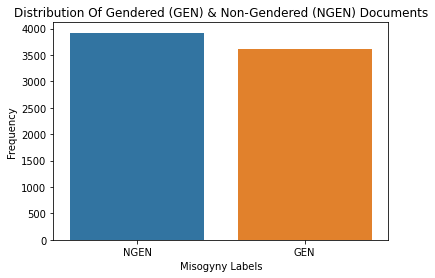

In [75]:
ax = sns.barplot(x=["NGEN", "GEN"], y=[NGEN_count, GEN_count])
ax.set(xlabel="Misogyny Labels", ylabel="Frequency", title="Distribution Of Gendered (GEN) & Non-Gendered (NGEN) Documents")

#### Conclusion
GEN has been OverSampled, but a little bit of _noise_ has been maintained, and the impact of NGEN is reduced.

# Building The Models

## The Base Model For Both Classifiers

In [178]:
class BaseModel:
  def __init__(self, tokenization):
    self.loaded_data = False

    self.BERT_UNCASED_L12 = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"
    self.BERT_LAYER = hub.KerasLayer(BERT_UNCASED_L12, trainable=True)

    self.VOCAB_FILE = self.BERT_LAYER.resolved_object.vocab_file.asset_path.numpy()

    self.do_lower_case = self.BERT_LAYER.resolved_object.do_lower_case.numpy()
    self.tokenizer = tokenization.FullTokenizer(self.VOCAB_FILE, self.do_lower_case)

  def bert_encode(self, texts, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = self.tokenizer.tokenize(text)
            
        text = text[: max_len - 2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = self.tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

  def load_data(self, training, validation, labels_column):
    self.value_counts = training[labels_column].value_counts()
    self.X_train = self.bert_encode(training["text"].values, max_len=160)
    self.X_val = self.bert_encode(validation["text"].values, max_len=160)
    self.y_train = training[labels_column].values
    self.y_val = validation[labels_column].values

    self.loaded_data = True

  def calc_class_weights(self):
    if not self.loaded_data:
      return None # throw exception here

    class_counts = [x for x in self.value_counts]
    class_weights = []
    total_count = sum(class_counts)

    i = 0
    while i < len(class_counts):
      class_weights.append((1 / class_counts[i]) * (total_count / 2.0))
      i += 1

    self.class_weight = { i: class_weights[i] for i in range(len(class_weights)) }
    return self.class_weight

## The Aggression Classifier's Model

In [181]:
class AggressionClassifierModel(BaseModel):
  def __init__(self, tokenization):
    super().__init__(tokenization)

    self.epochs = 3
    self.learning_rate = 1e-5
    self.batch_size = 16
  
  def build_model(self, max_len=512):
      input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
      input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
      segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

      pooled_output, sequence_output = self.BERT_LAYER([input_word_ids, input_mask, segment_ids])
      clf_output = sequence_output[:, 0, :]
      net = tf.keras.layers.Dense(32, activation='relu')(clf_output)
      net = tf.keras.layers.Dropout(0.2)(net)
      net = tf.keras.layers.Dense(16, activation='relu')(net)
      net = tf.keras.layers.Dropout(0.2)(net)
      out = tf.keras.layers.Dense(3, activation='softmax')(net)
      
      model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
      model.compile(tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
      
      return model

  def train_model(self):
    if not self.loaded_data or not self.class_weight:
      return None # throw exception here

    model = self.build_model(max_len=160)
    model.summary()

    checkpoint = ModelCheckpoint(OUT_DIR["MODEL_A"], monitor='val_accuracy', save_best_only=True, verbose=1)
    earlystopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)

    train_history = model.fit(
        self.X_train, self.y_train,
        validation_data=(X_val, y_val),
        epochs=self.epochs,
        callbacks=[checkpoint, earlystopping],
        batch_size=self.batch_size,
        class_weight=self.class_weight
    )

  def load_model(self):
    self.model = tf.keras.models.load_model(OUT_DIR["MODEL_A"], custom_objects={'KerasLayer':hub.KerasLayer}, compile=False)
    self.model.compile(tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

    scores = self.model.evaluate(self.X_val, self.y_val, verbose=0)
    print("{}: {:.2f}%" % (self.model.metrics_names[1], scores[1] * 100))

  def evaluate_model(self):
    if not self.model:
      return None # throw exception here

    predicted_labels = np.argmax(self.model.predict(self.X_val), axis=1)

    print(predicted_labels)
    print(classification_report(y_val, predicted_labels))

    print(f"F1_Score: {f1_score(y_val, predicted_labels, average=None)}")

### Aggression Classifier Model Evaluation

In [ ]:
agg_clf = AggressionClassifierModel(tokenization)
agg_clf.load_data(train_A, val_A, "labels_A")
agg_clf.calc_class_weights()
agg_clf.train_model()
agg_clf.load_model()
agg_clf.evaluate_model()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 160)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 160)]        0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 160, 768)]                'input_mask[0][0]',       

## The Misogyny Classifier's Model

In [ ]:
class MisogynyClassifierModel(BaseModel):
  def __init__(self, tokenization):
    super().__init__(tokenization)

    self.epochs = 5
    self.learning_rate = 1e-5
    self.batch_size = 16
  
  def build_model(self, max_len=512):
      input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
      input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
      segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

      pooled_output, sequence_output = self.BERT_LAYER([input_word_ids, input_mask, segment_ids])
      clf_output = sequence_output[:, 0, :]
      net = tf.keras.layers.Dense(24, activation='relu')(clf_output)
      net = tf.keras.layers.Dropout(0.2)(net)
      net = tf.keras.layers.Dense(12, activation='relu')(net)
      net = tf.keras.layers.Dropout(0.2)(net)
      out = tf.keras.layers.Dense(2, activation='softmax')(net)
      
      model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
      model.compile(tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
      
      return model

  def train_model(self):
    if not self.loaded_data or not self.class_weight:
      return None # throw exception here

    model = self.build_model(max_len=100)
    model.summary()

    checkpoint = ModelCheckpoint(OUT_DIR["MODEL_B"], monitor='val_accuracy', save_best_only=True, verbose=1)
    earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

    train_history = model.fit(
        self.X_train, self.y_train,
        validation_data=(X_val, y_val),
        epochs=self.epochs,
        callbacks=[checkpoint, earlystopping],
        batch_size=self.batch_size,
        class_weight=self.class_weight
    )

  def load_model(self):
    self.model = tf.keras.models.load_model(OUT_DIR["MODEL_B"], custom_objects={'KerasLayer':hub.KerasLayer}, compile=False)
    self.model.compile(tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

    scores = self.model.evaluate(self.X_val, self.y_val, verbose=0)
    print("{}: {:.2f}%" % (self.model.metrics_names[1], scores[1] * 100))

  def evaluate_model(self):
    if not self.model:
      return None # throw exception here

    predicted_labels = np.argmax(self.model.predict(self.X_val), axis=1)

    print(predicted_labels)
    print(classification_report(y_val, predicted_labels))

    print(f"F1_Score: {f1_score(y_val, predicted_labels, average=None)}")

Misogyny Classifier Model Evaluation

In [ ]:
msgny_clf = MisogynyClassifierModel(tokenization)
msgny_clf.load_data(train_B, val_B, "labels_B")
msgny_clf.calc_class_weights()
msgny_clf.train_model()
msgny_clf.load_model()
msgny_clf.evaluate_model()

# Results

In [ ]:
print([x == y for x, y in zip(val_labels, predicted_labels)])

tp = 0
tn = 0
fp = 0
fn = 0
for x, y in zip(val_labels, predicted_labels):
  if x and x == y:
    tp += 1
  elif not x and x == y:
    tn += 1
  elif x and x != y:
    fp += 1
  elif not x and x != y:
    fn += 1

print(f"TP: {tp} | FP: {fp} | FN: {fn} | TN: {tn}")

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[tp, fp], [fn, tn]]
df_cm = pd.DataFrame(array, index = ["True", "False"],
                  columns = ["True", "False"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')